# Market Segmentation on mcDonalds Dataset 

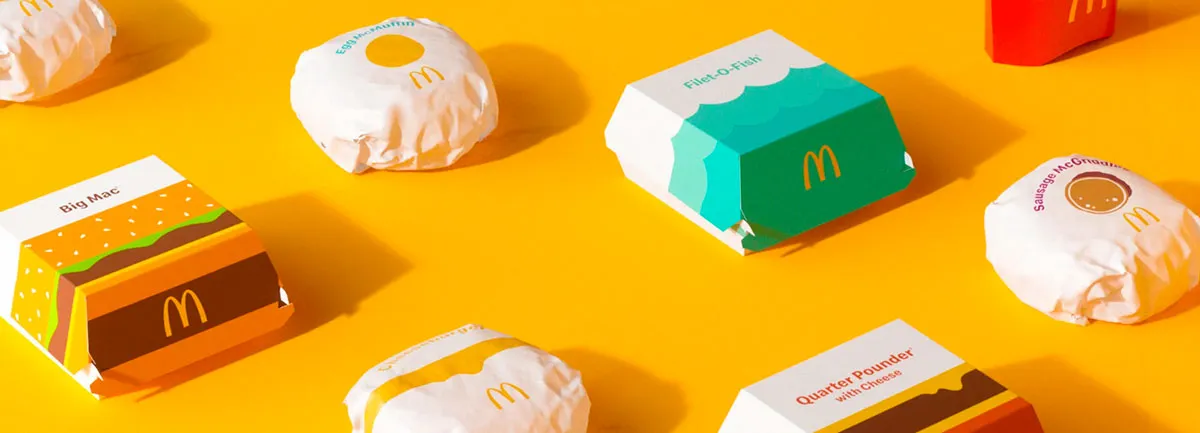

## Importing Libraries

## Creating DataFrame 

In [1]:
df = pd.read_csv("mcdonalds.csv",delimiter=",")
df.head(10)

NameError: name 'pd' is not defined

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

## Data Visulization 

In [ ]:
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]
print(sizes)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.5, title='Gender wise Distribution' )])
fig.show()

In [ ]:
fig1 = px.histogram(df, x="Age",color="Age",title='Age wise costumer distribution')
fig1.update_layout(bargap=0.2)

In [ ]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
fig2 = sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

## Pre-Processing 

In [ ]:
df.drop(['Like','Age','VisitFrequency','Gender'],axis=1,inplace=True)

In [ ]:
df = df.replace({'No':0, 'Yes': 1})
df.head()

In [ ]:
df.describe()

In [ ]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(df)

pca = PCA(n_components=11)
pc = pca.fit_transform(df)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams['figure.figsize'] = (5,4)
plt.show()

## Applying Kmeans Clustering And Finding Optimal no of Cluster

In [ ]:
from sklearn.cluster import KMeans
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='red')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [ ]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pf.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='blue')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Here using elbow plot we can see that 4 cluster  can gives us optimal results

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pf.iloc[:,:2])

In [ ]:
y_kmeans = kmeans.predict(pf.iloc[:,:2])
print(y_kmeans.shape)

In [ ]:
y_kmeans

In [ ]:
df['Cluster'] = y_kmeans
df.head()

## Plotting all the clusters

In [ ]:
dfc1 =pf[df.Cluster==0]
dfc2 =pf[df.Cluster==1]
dfc3 =pf[df.Cluster==2]
dfc4 =pf[df.Cluster==3]

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = 10,10

sns.scatterplot(dfc1['pc1'],dfc1['pc2'])
sns.scatterplot(dfc2['pc1'],dfc2['pc2'])
sns.scatterplot(dfc3['pc1'],dfc3['pc2'])
sns.scatterplot(dfc4['pc1'],dfc4['pc2'])

plt.legend(labels=["Cluster 1","Cluster 2","Cluster 3","Cluster 4"])